In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
data=pd.read_csv('height-weight.csv')

In [56]:
data.head(2)

,Weight,Height
0,45,120
1,58,135


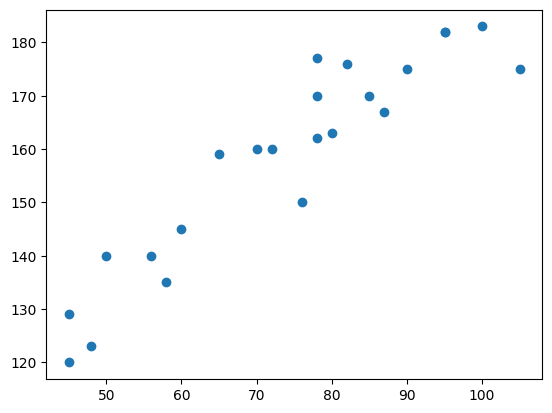

In [57]:
plt.scatter(data.Weight,data.Height)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x=data[['Weight']]

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,data.Height,test_size=0.20,random_state=42)

In [61]:
data.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
std_scale=StandardScaler()

In [64]:
x_train=std_scale.fit_transform(x_train)

In [65]:
x_test=std_scale.transform(x_test)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
regressor=LinearRegression()

In [68]:
regressor.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [69]:
x_test,y_test

(array([[ 0.21043706],
        [ 0.21043706],
        [-1.6552288 ],
        [ 1.17153765],
        [-0.52452222]]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

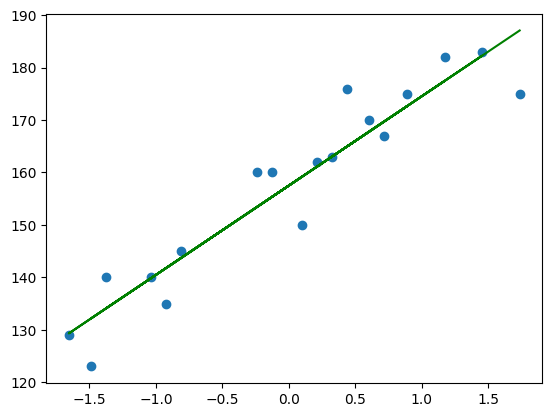

In [70]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'g')

In [71]:
y_pred=regressor.predict(x_test)

In [72]:
y_pred,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

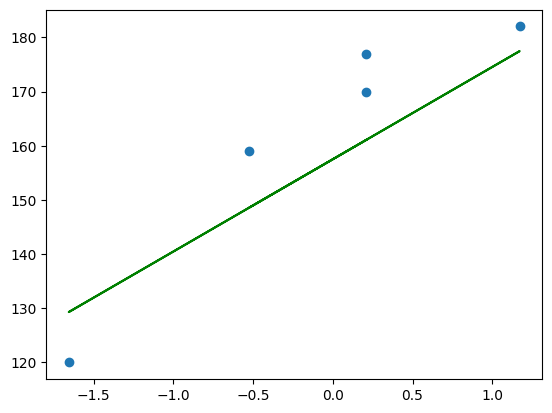

In [73]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,'g')

In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [77]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [78]:
mse

109.77592599051664

In [79]:
mae

9.822657814519232

In [80]:
r2

0.776986986042344

In [81]:
import pickle

In [83]:
pickle.dump(std_scale,open('regressor','wb'))

In [84]:
import pickle
from flask import Flask,request,jsonify,render_template
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

application=Flask(__name__)
app=application

model=pickle.load(open('regressor','rb'))

@app.route("/")
def index():
    return render_template('index.html')

@app.route("/predict",methods=["GET","POST"])
def predict():
    if request.method=="POST":
        weight=float(request.form.get('Weight'))
        result=model.predict([[weight]])
        return render_template('home.html',results=result[0])
    else:
        return render_template('home.html')

if __name__=="__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\sona9\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [85]:
import pickle
from flask import Flask, request, render_template

application = Flask(__name__)
app = application

# load model
model = pickle.load(open('regressor', 'rb'))

@app.route("/predict", methods=["GET", "POST"])
def predict():
    results = None
    if request.method == "POST":
        weight = float(request.form.get('Weight'))
        results = model.predict([[weight]])[0]
    return render_template('predict.html', results=results)

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1